In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [6]:
data=pd.read_csv("C:\\Users\kanna\OneDrive\Desktop\ML\HDDS\heart.csv")

In [7]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


age in years

sex(1 = male; 0 = female)

cpchest pain type

trestbpsresting blood pressure (in mm Hg on admission to the hospital)

cholserum cholestoral in mg/dl

fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecgresting electrocardiographic results

thalachmaximum heart rate achieved

exangexercise induced angina (1 = yes; 0 = no)

oldpeakST depression induced by exercise relative to rest

slopethe slope of the peak exercise ST segment

canumber of major vessels (0-3) colored by flourosopy

thal3 = normal; 6 = fixed defect; 7 = reversable defect

target1 or 0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [10]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

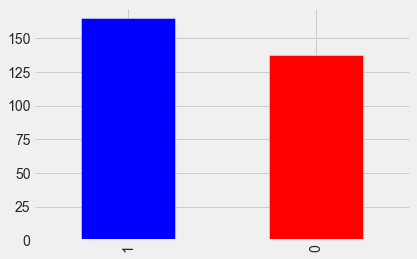

In [11]:
data.target.value_counts().plot(kind="bar", color=["blue", "red"])


In [12]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
categorical_val = []
continuous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

We are Creating 2 Arrays that Displays the Distinct Values of each Feature and Classifies them as Categortical or Continuous Variable

In [14]:
# Displays What are all the Categorical Variables Available for this Dataset
categorical_val


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
# Displays What are all the Continuous Variables Available for this Dataset
continuous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

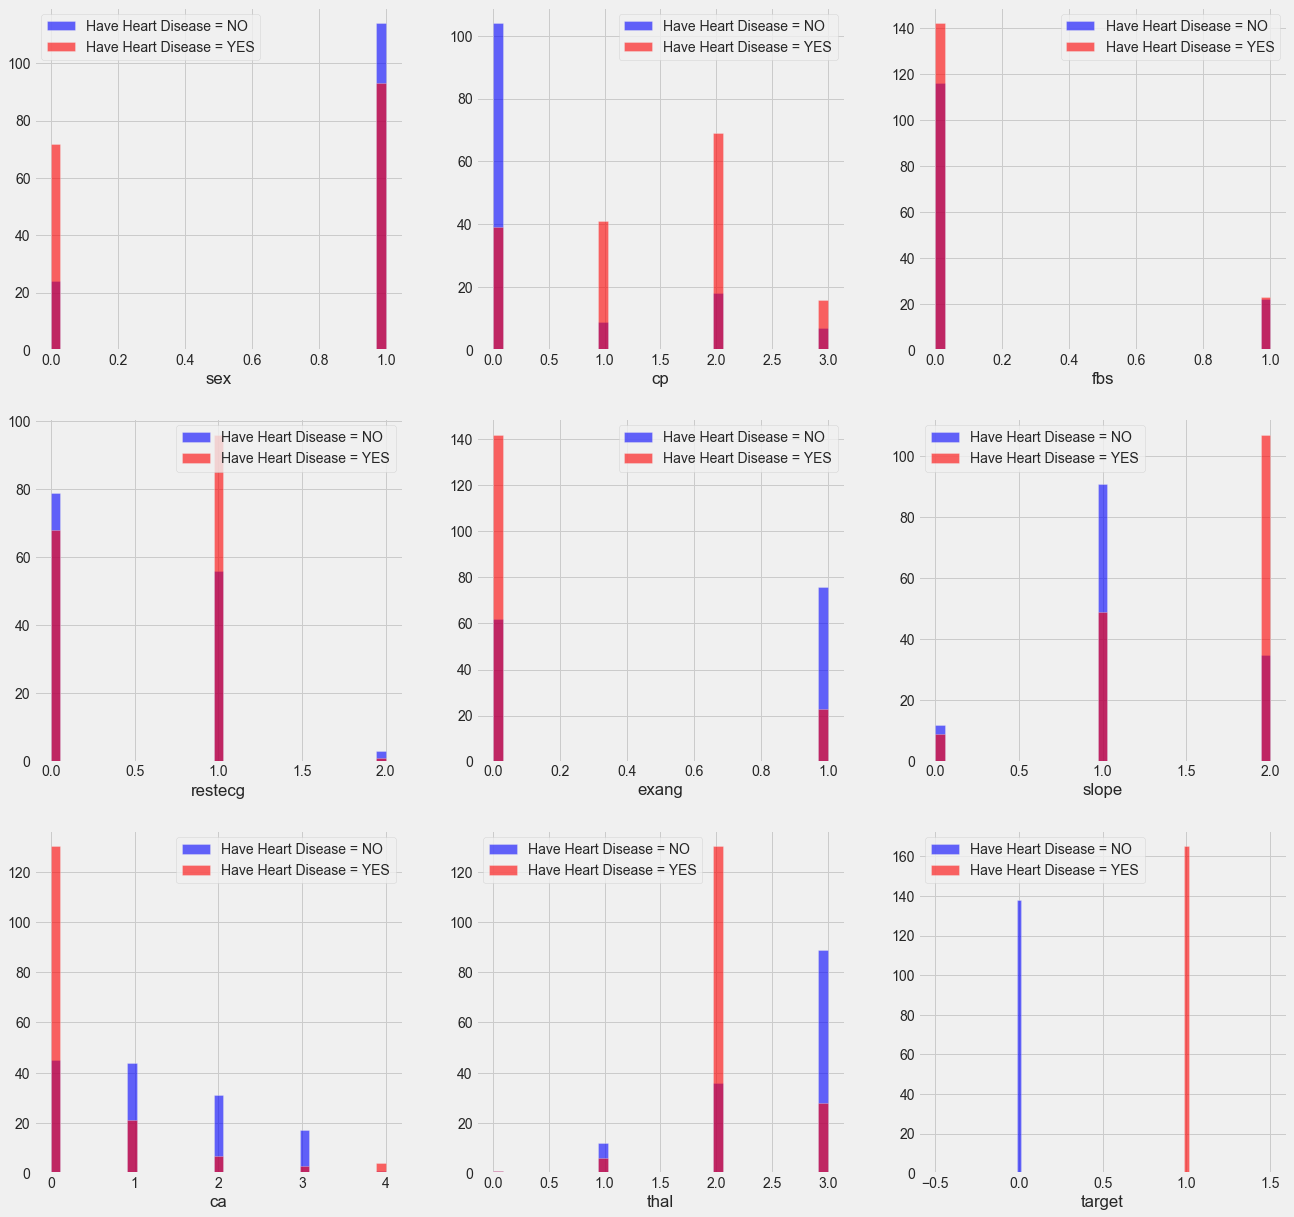

In [16]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

For the Different Categorical Variables, We plot the Histogram plot to depict the number of people suffering from heard disease and number of people who aren't Suffering from Heart Disease.

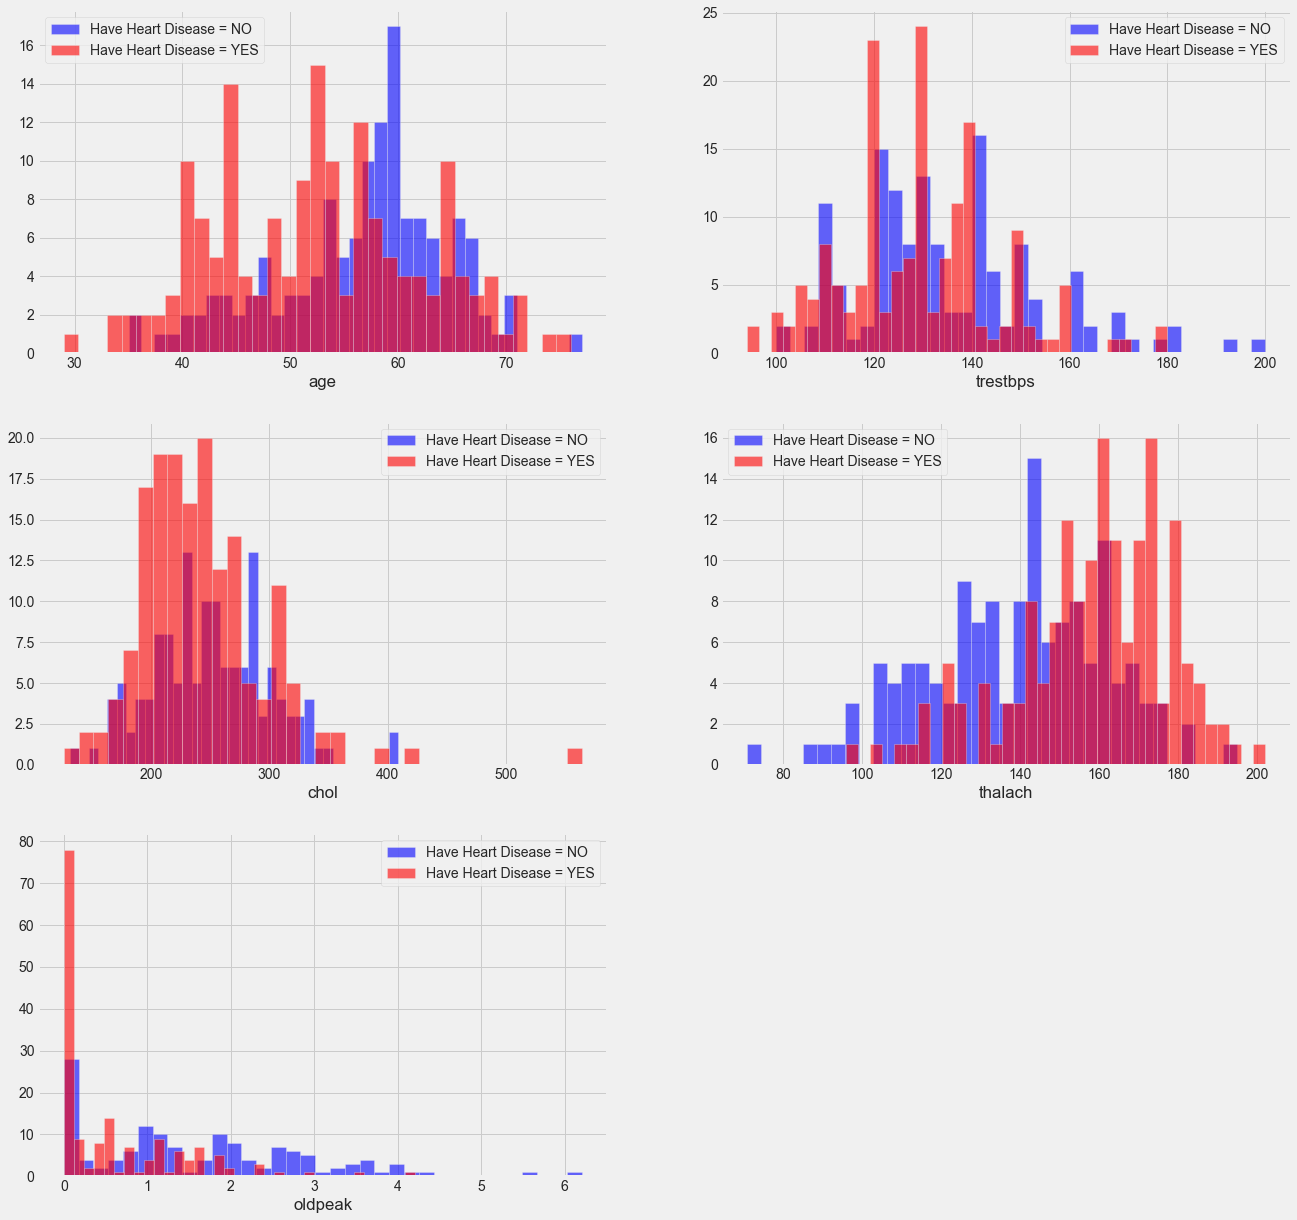

In [28]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Similarly, This Depicts the number of people having heart disease and people with no heart disease but for continuous features.

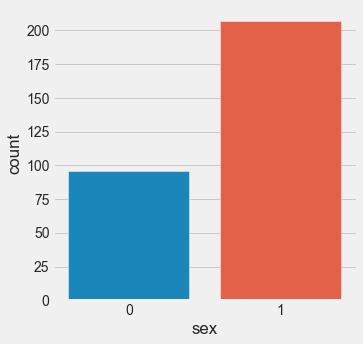

In [29]:
#Checking gender Count (1-Male, 0-Female)
sns.catplot('sex', data=data, kind='count')

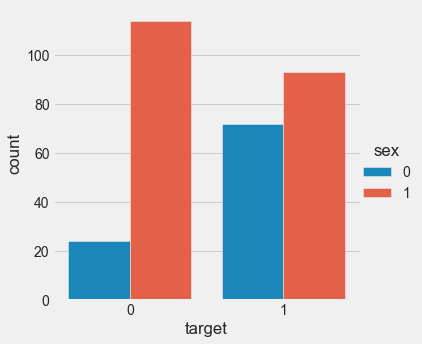

In [30]:
# Now let separate the gender by target passing 'Sex' to the 'hue' parameter
sns.catplot('target', data=data, hue='sex', kind='count')

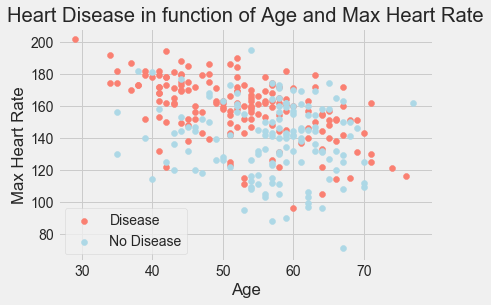

In [31]:
# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

This Scatter Plot Represents Age Vs Max Heart Rate according to their disease state i.e., if they are suffering from any Heart Disease or Not.

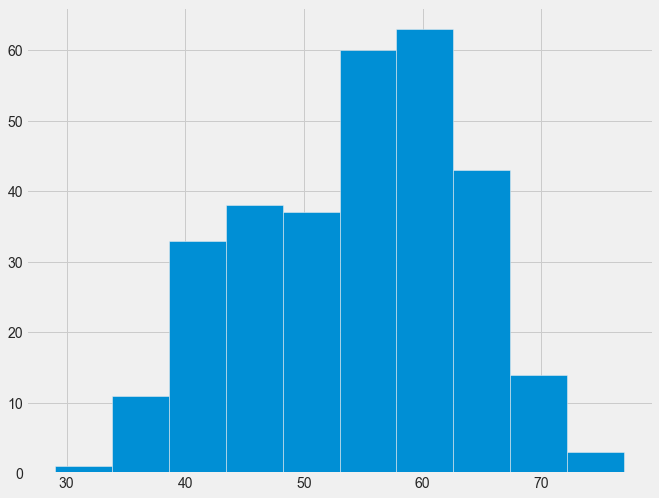

In [32]:
#Age Group Of People in this Particular Dataset
plt.figure(figsize=(10, 8))
data.age.hist()

We Observe Maximum People Lie in the Age Group from 55-65.

In [33]:
#The Average Patient Age is
print(f"The average age of the patients is  : {data.age.mean()}")

The average age of the patients is  : 54.366336633663366


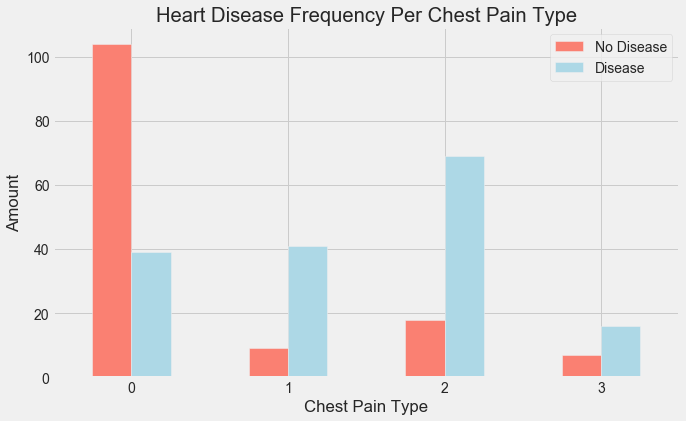

In [34]:
pd.crosstab(data.cp, data.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

This Depicts the Heart Disease Frequency per Chest Pain Type
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease

(14.5, -0.5)

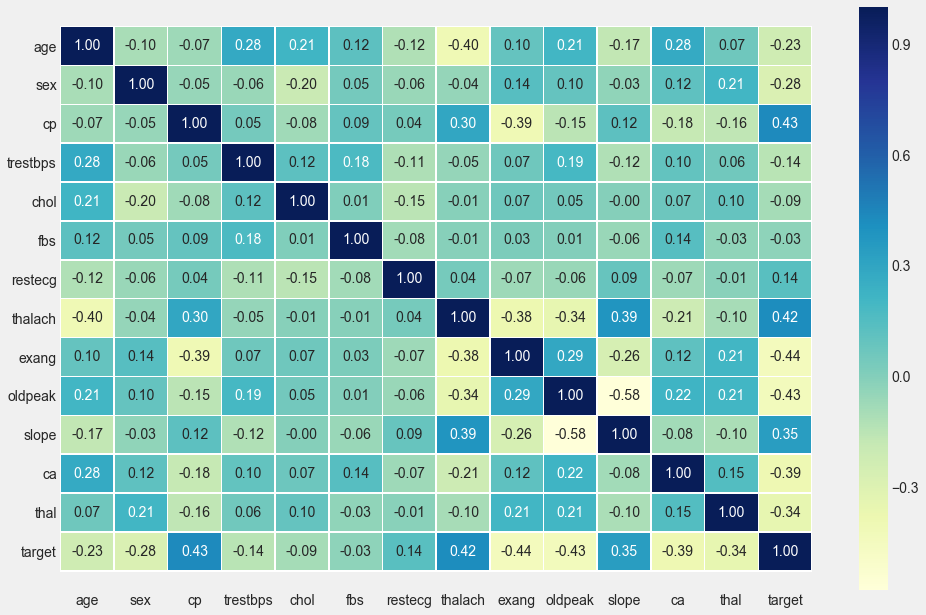

In [35]:
# Correlation Matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

We Find a Mixed Plot Of Correlation Amon Variables. We Find that Most of the Variables are Negatively Corrrelated with each other and moreover, we also find that there doesnt exist any variable that has a High Positive Correlation with Other Variable.

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [36]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_score = []
best_score = 0
best_score_index = 0

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X, y, cv=10)
    knn_score.append(score.mean())
    if score.mean() > best_score:
        best_score = score.mean()
        best_score_index = k

In [38]:
print(f"Best score {best_score}, use {best_score_index} neighbors.")

Best score 0.6768631813125696, use 7 neighbors.


In [43]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.6887

Classification Report: 
 	Precision: 0.7168141592920354
	Recall Score: 0.7043478260869566
	F1 score: 0.7105263157894739

Confusion Matrix: 
 [[65 32]
 [34 81]]

Test Result:
accuracy score: 0.6593406593406593

Classification Report: 
 	Precision: 0.7021276595744681
	Recall Score: 0.66
	F1 score: 0.6804123711340208

Confusion Matrix: 
 [[27 14]
 [17 33]]



The Accuracy Of the KNN Model is only 68.87% while training and 65.93% while testing. The Model Needs to be Further Imporoved. This Can be done by adding more Features and applying more training and testing.

In [22]:
X = data.drop('target', axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, 
                              verbose=1, cv=3, iid=True)


In [48]:
# grid_search_cv.fit(X_train, y_train)
# grid_search_cv.best_estimator_
tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8679

Classification Report: 
 	Precision: 0.859504132231405
	Recall Score: 0.9043478260869565
	F1 score: 0.8813559322033899

Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
accuracy score: 0.7692307692307693

Classification Report: 
 	Precision: 0.8085106382978723
	Recall Score: 0.76
	F1 score: 0.7835051546391754

Confusion Matrix: 
 [[32  9]
 [12 38]]



The Accuracy For This Model using Decision Tree Algorithm is 
Train: 86.79
Test: 76.92
It is Still a better accuracy score when compared to KNN.
The Model can and has to be further more trained and Tested so that we get the maximum Accuracy Possible.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear", "lbfgs"]}

log_reg = LogisticRegression()

grid_search_cv = GridSearchCV(log_reg, params, scoring="accuracy", n_jobs=-1, 
                              verbose=1, cv=3, iid=True)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.1s finished
C:\Users\kanna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'C': array([1.00000000e-0...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [40]:
grid_search_cv.best_estimator_

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
log_reg = LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

log_reg.fit(X_train, y_train)

print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8726

Classification Report: 
 	Precision: 0.8492063492063492
	Recall Score: 0.9304347826086956
	F1 score: 0.8879668049792531

Confusion Matrix: 
 [[ 78  19]
 [  8 107]]

Test Result:
accuracy score: 0.8131868131868132

Classification Report: 
 	Precision: 0.8235294117647058
	Recall Score: 0.84
	F1 score: 0.8316831683168315

Confusion Matrix: 
 [[32  9]
 [ 8 42]]



C:\Users\kanna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Using Logistic Regression, we find out the prediction based on Target Variable (As the Target Variable is Binary). The Target Variable Here being The Person Suffering From Heart Disease or Not.
From the Accuracy that we get, The Model is not that very accurate and cannot be deployed until there is more testing and training done on the data and also we can increase the accuracy by adding more number of features that might help in predicting target variable.